# Final Project CSCI 182
## Members: Danny Bowers, Patrick Callahan, Allen Shahshahani

In [1]:
#Import the necessary library to access the Spotify API
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

#attach the Spotify API necessities. 
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id="d7ab2112e221473a8b2a7a88c1aac45e",
                                                           client_secret="fde374bcf24947c1812412a474d3ef94"))

#This will query the top 20 tracks from the artist Milky Chance
results = sp.search(q='milky chance', limit=20)
for idx, track in enumerate(results['tracks']['items']):
    print(idx, track['name'])

0 Stolen Dance
1 Flashed Junk Mind
2 Cocoon
3 Colorado
4 Tainted Love
5 Down By The River
6 Unknown Song
7 Don't Let Me Down
8 Colorado
9 Levitating
10 Fairytale
11 Save Your Tears
12 Daydreaming
13 Sweet Sun
14 Love Again
15 Blossom
16 The Game
17 Fado
18 La Noche De Anoche
19 Firebird


In [2]:
lz_uri = 'spotify:artist:36QJpDe2go2KgaRleHCDTp'

spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id="d7ab2112e221473a8b2a7a88c1aac45e",
                                                           client_secret="fde374bcf24947c1812412a474d3ef94"))
results = spotify.artist_top_tracks(lz_uri)

for track in results['tracks'][:10]:
    print('track    : ' + track['name'])
    print('audio    : ' + track['preview_url'])
    print('cover art: ' + track['album']['images'][0]['url'])
    print()

track    : Stairway to Heaven - Remaster
audio    : https://p.scdn.co/mp3-preview/8226164717312bc411f8635580562d67e191a754?cid=d7ab2112e221473a8b2a7a88c1aac45e
cover art: https://i.scdn.co/image/ab67616d0000b273c8a11e48c91a982d086afc69

track    : Immigrant Song - Remaster
audio    : https://p.scdn.co/mp3-preview/8455599677a13017978dcd3f4b210937f0a16bcb?cid=d7ab2112e221473a8b2a7a88c1aac45e
cover art: https://i.scdn.co/image/ab67616d0000b27390a50cfe99a4c19ff3cbfbdb

track    : Whole Lotta Love - 1990 Remaster
audio    : https://p.scdn.co/mp3-preview/ce11b19a4d2de9976d7626df0717d0073863909c?cid=d7ab2112e221473a8b2a7a88c1aac45e
cover art: https://i.scdn.co/image/ab67616d0000b273fc4f17340773c6c3579fea0d

track    : Black Dog - Remaster
audio    : https://p.scdn.co/mp3-preview/9b76619fd9d563a48d38cc90ca00c3008327b52e?cid=d7ab2112e221473a8b2a7a88c1aac45e
cover art: https://i.scdn.co/image/ab67616d0000b273c8a11e48c91a982d086afc69

track    : Kashmir - Remaster
audio    : https://p.scdn.co/mp3

# Where the Project Begins

In [3]:
import spotipy
import sys
import spotipy.util as util

# Add the tokens necessary to use the Spotify API
username = 'connor19802'
SPOTIPY_CLIENT_ID = 'd7ab2112e221473a8b2a7a88c1aac45e'
SPOTIPY_CLIENT_SECRET = 'fde374bcf24947c1812412a474d3ef94'
SPOTIPY_REDIRECT_URI='http://localhost:8080/callback'

In [4]:
# Authenticate the user and make the scope capable of reading the top values for the authenticated user
scope = 'user-top-read'
token = util.prompt_for_user_token(username, scope, client_id=SPOTIPY_CLIENT_ID,
                           client_secret=SPOTIPY_CLIENT_SECRET,
                           redirect_uri=SPOTIPY_REDIRECT_URI)
sp = spotipy.Spotify(auth=token)

In [5]:
import pandas as pd


top_liked_song_names = sp.current_user_top_tracks(limit=50) #Get the top 50 songs of the user
top_liked_song_id = {}
#create a dictionary of the song names and id's 
for name in top_liked_song_names['items']:
    top_liked_song_id[name['name']] = name['id']

audio_features_list = []
#make a list of the audio features of those top 50 songs
for song, id in top_liked_song_id.items():
    audio_track_info = sp.audio_features(id)
    audio_features_list.append(audio_track_info)

print(top_liked_song_id)


{'26': '1SqAcHRKodDP1mxvAqkCvU', 'All That and More (Sailboat)': '6vyFAHVKIsp3pdyhlOKMAz', 'All the Debts I Owe': '6255IIBwKySv6RYrOeHfQh', 'Next to You': '3MwHZDGwAR8RjZZBriBqmx', 'Pepas': '5fwSHlTEWpluwOM0Sxnh5k', 'Come Away': '1tpSOLApZSgDaFqYHIeQl9', 'Feathered Indians': '2tgQaL85WoRfgEa4hFQgrE', 'Roll The Bones - Audiotree Live Version': '1Yxbxg5R6dQcYmOdjvlXP0', 'Here I Am': '2yVhdgjCt0T2keTR1YlKEp', 'Long Nights': '4lxGVzcUaSF5HW5jtWnShV', 'La Mar': '2qrVYBy2PArMwQRVZxFWzz', 'Do It To It': '20on25jryn53hWghthWWW3', 'Silver Lining': '0i5QVxsK3IvEDbUjTA64Li', 'Lose Yourself': '77Ft1RJngppZlq59B6uP0z', 'heartbeat': '78MI46vAPFoPkLBJSgYADP', 'Lost in the Cold': '6UqjaI4yIo2uA0kA6ej8ui', 'Interior Crocodile Alligator': '6OfMguZO7yQBFquseyKVRm', 'Wiseman': '5lCRPA4XEg4VPbNu0lDHBA', 'Tainted Love': '1wAPbQ5XjbZqPl0WDl5mHH', 'Jiggle It - Album Version (Edited)': '03aQkxdJXhIRemkkKS0JvR', 'Going Gets Tough': '0dEhydwCE5Og4PLKyjfqMR', 'Right Me Up': '2f5m5MB4H5wRS5iu7oee1Q', 'Gone': '4sX4

In [6]:
#Add the song names to those dictionaries so we know what songs have which features
for i in audio_features_list:
    for song in top_liked_song_id.keys():
        i[0]['Song_Name'] = song
        del top_liked_song_id[song]
        break
 

In [7]:

list_audio_ = []
#clean up the list because it had nested lists with single dictionaries within each nested list. Instead make it one list of dictionaries
for i in audio_features_list:
    for j in i: 
        list_audio_.append(j)

#Create dataframe off those features
df = pd.DataFrame(list_audio_)
#Process which audio data will be necessary and delete the uneseccary data from the datafram
del df['uri']
del df['track_href']
del df['analysis_url']
del df['type']
del df['time_signature']
del df['mode']
df.head()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,Song_Name
0,0.494,0.341,2,-12.501,0.0508,0.66200,0.000571,0.0673,0.3910,171.210,1SqAcHRKodDP1mxvAqkCvU,235416,26
1,0.455,0.525,7,-9.225,0.1490,0.80200,0.000000,0.2260,0.3830,83.237,6vyFAHVKIsp3pdyhlOKMAz,171025,All That and More (Sailboat)
2,0.483,0.486,0,-11.062,0.0434,0.75300,0.004790,0.1340,0.4660,92.048,6255IIBwKySv6RYrOeHfQh,193049,All the Debts I Owe
3,0.443,0.419,7,-7.975,0.0321,0.63300,0.001830,0.4040,0.0719,132.204,3MwHZDGwAR8RjZZBriBqmx,256520,Next to You
4,0.762,0.766,7,-3.955,0.0343,0.00776,0.000070,0.1280,0.4420,130.001,5fwSHlTEWpluwOM0Sxnh5k,287120,Pepas


In [8]:
import matplotlib.pyplot as plt
import numpy as np


In [9]:
audio_analysis_list = {}
#make a list of the audio analysis of those top 50 songs
#create a dictionary of the song names and id's 
for name in top_liked_song_names['items']:
    top_liked_song_id[name['name']] = name['id']
    
for i in top_liked_song_id:
    audio_analysis_list[i] = []
for song, id in top_liked_song_id.items():
    count = 0
    audio_track_info = sp.audio_analysis(id)
    while count < (len(audio_track_info['segments'])-1):
        audio_analysis_list[song].append(audio_track_info['segments'][count]['pitches'])
        count+=1

In [10]:
# Print the pitch segments for each songs
length_of_pitch_segments = []
for i in audio_analysis_list:   
    length_of_pitch_segments.append(len(audio_analysis_list[i]))

In [11]:
#add it to the dataframe
print(length_of_pitch_segments)
df['pitches'] = length_of_pitch_segments
df.head()

[861, 646, 717, 744, 1206, 851, 807, 987, 1060, 448, 855, 816, 616, 1336, 958, 958, 517, 526, 647, 970, 804, 901, 436, 532, 682, 1071, 513, 932, 1021, 698, 784, 976, 734, 731, 701, 704, 687, 404, 635, 742, 471, 583, 881, 927, 720, 1006, 887, 961, 886, 742]


,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,Song_Name,pitches
0,0.494,0.341,2,-12.501,0.0508,0.66200,0.000571,0.0673,0.3910,171.210,1SqAcHRKodDP1mxvAqkCvU,235416,26,861
1,0.455,0.525,7,-9.225,0.1490,0.80200,0.000000,0.2260,0.3830,83.237,6vyFAHVKIsp3pdyhlOKMAz,171025,All That and More (Sailboat),646
2,0.483,0.486,0,-11.062,0.0434,0.75300,0.004790,0.1340,0.4660,92.048,6255IIBwKySv6RYrOeHfQh,193049,All the Debts I Owe,717
3,0.443,0.419,7,-7.975,0.0321,0.63300,0.001830,0.4040,0.0719,132.204,3MwHZDGwAR8RjZZBriBqmx,256520,Next to You,744
4,0.762,0.766,7,-3.955,0.0343,0.00776,0.000070,0.1280,0.4420,130.001,5fwSHlTEWpluwOM0Sxnh5k,287120,Pepas,1206


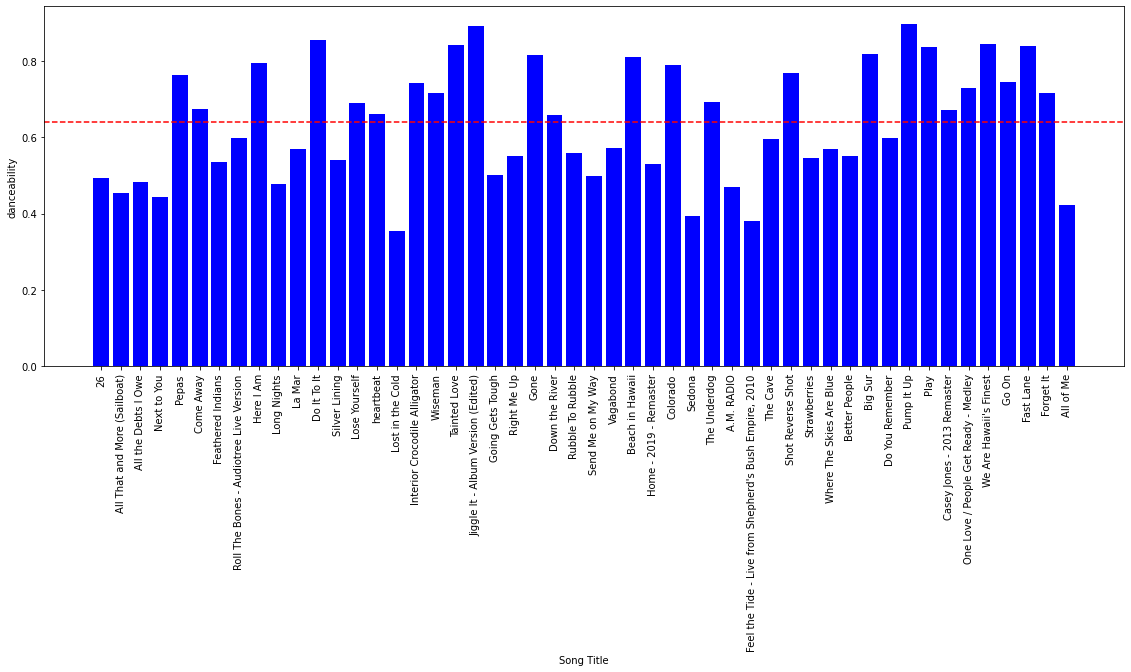

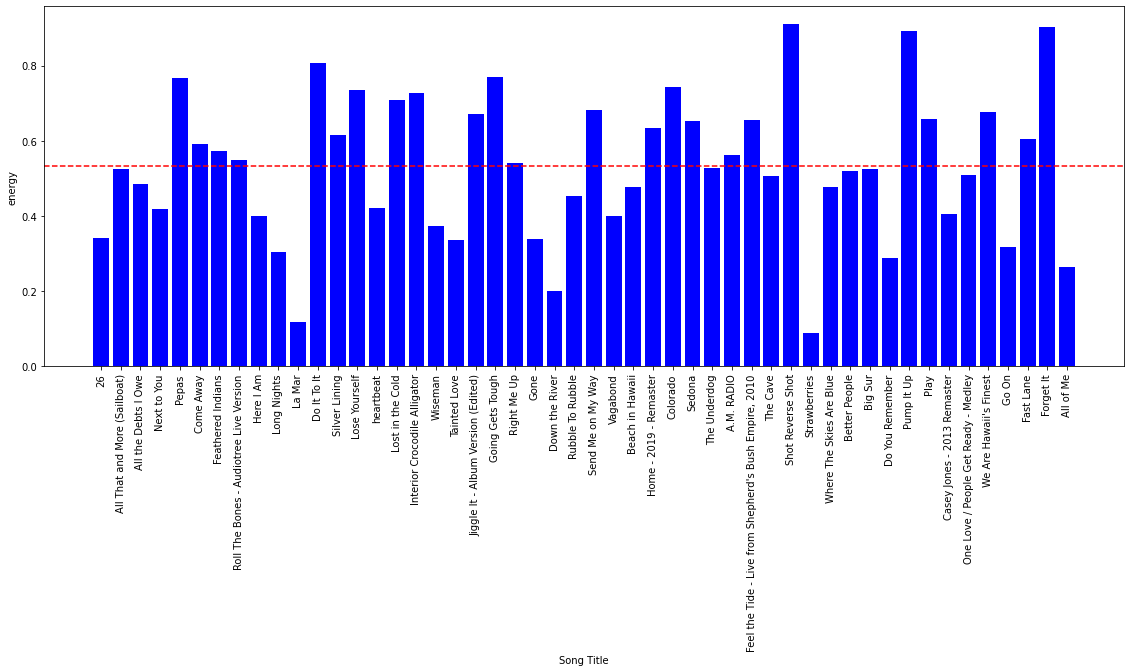

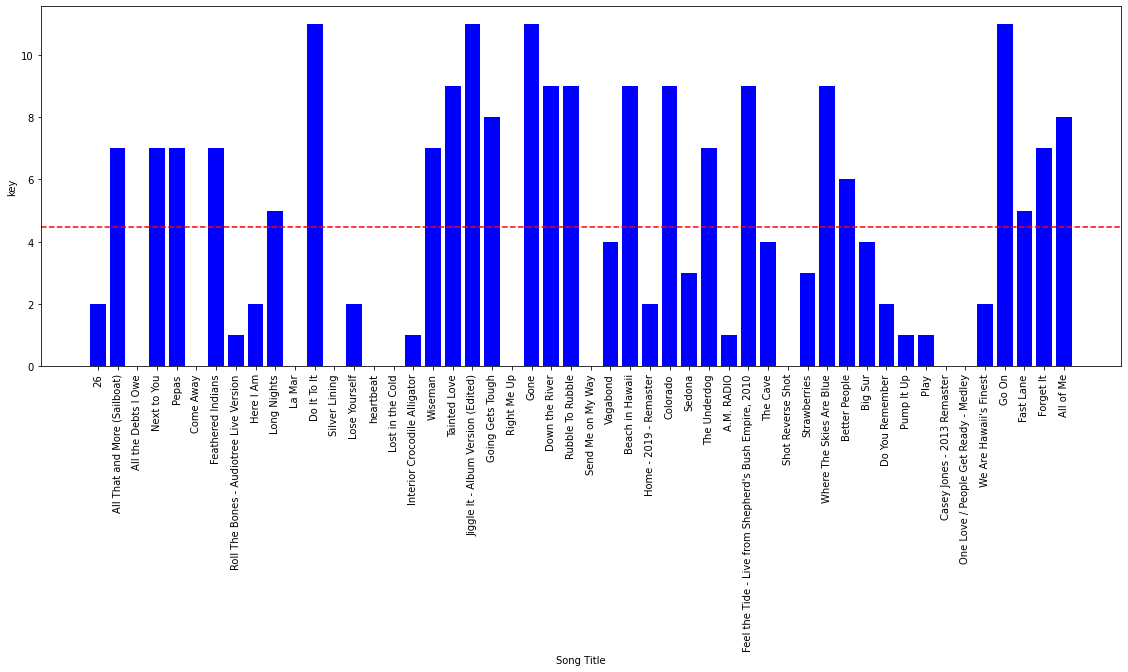

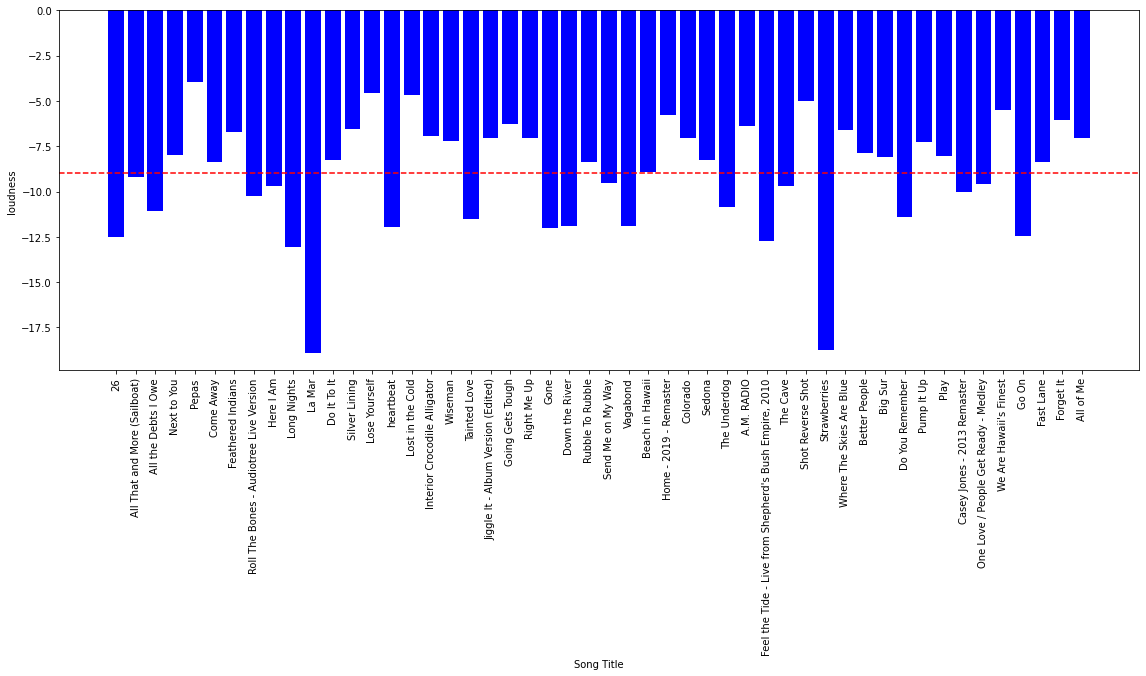

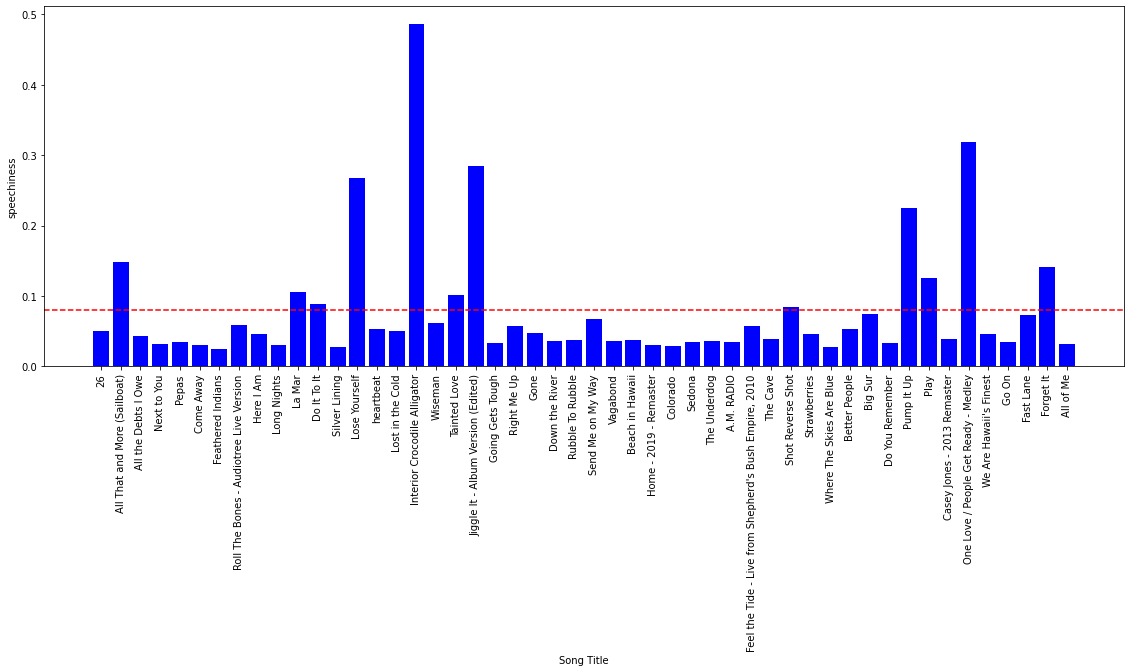

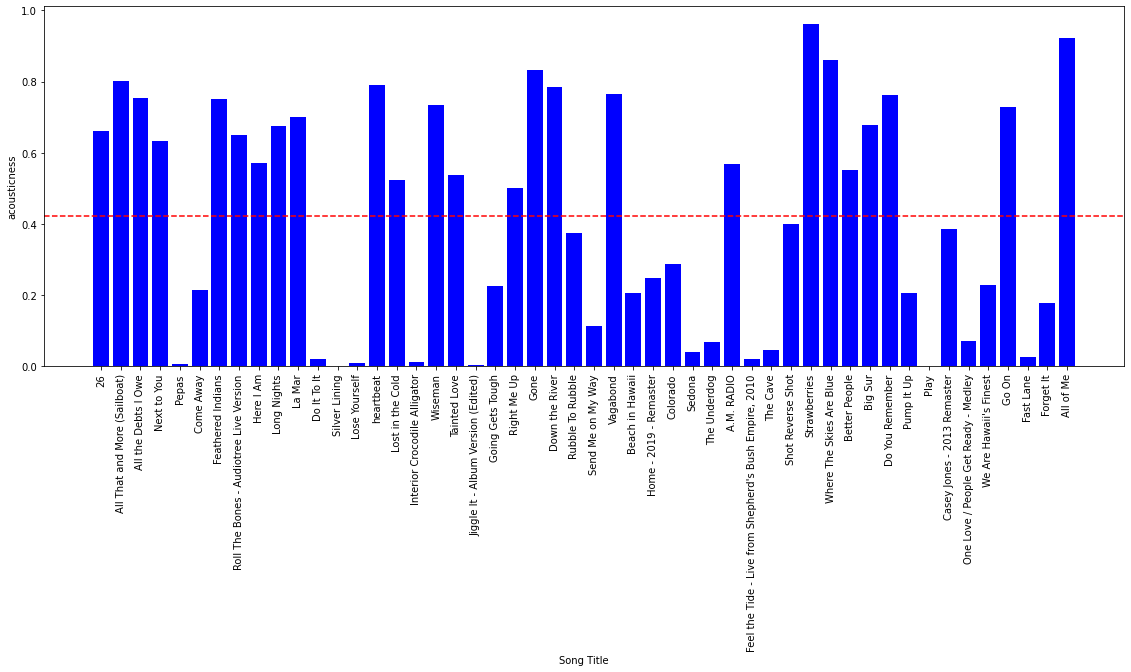

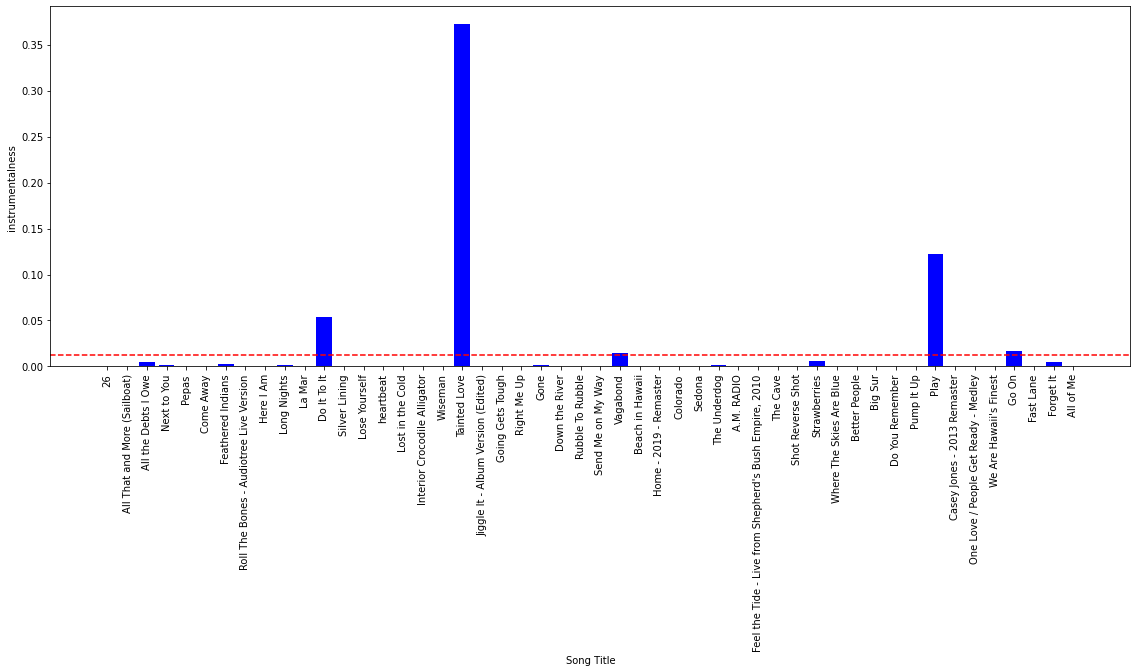

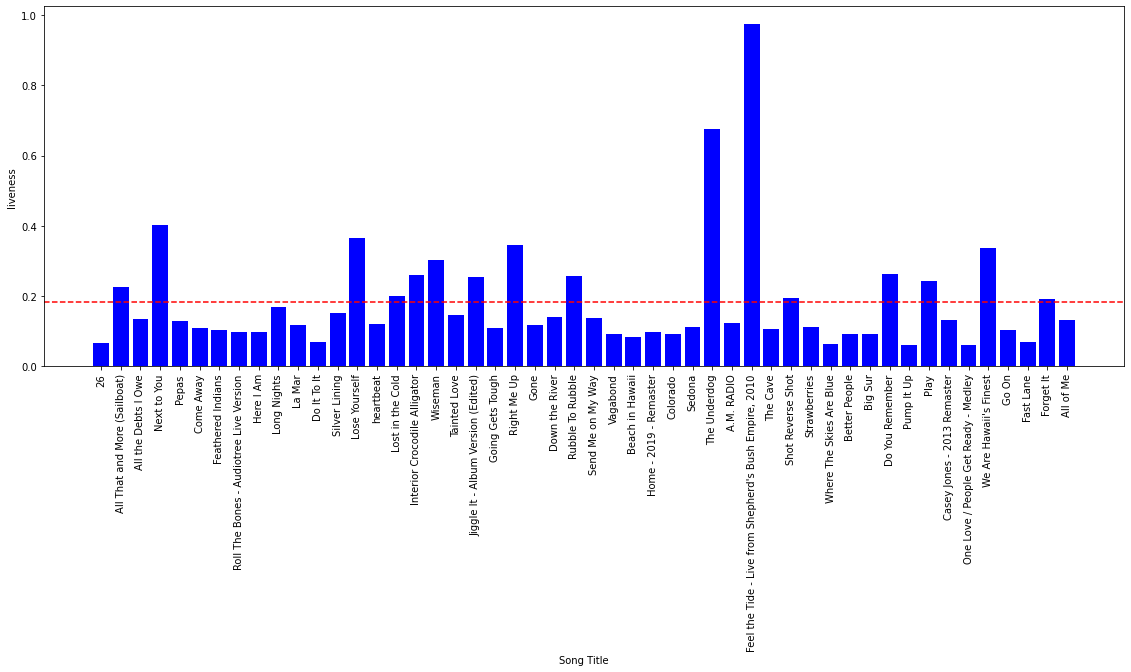

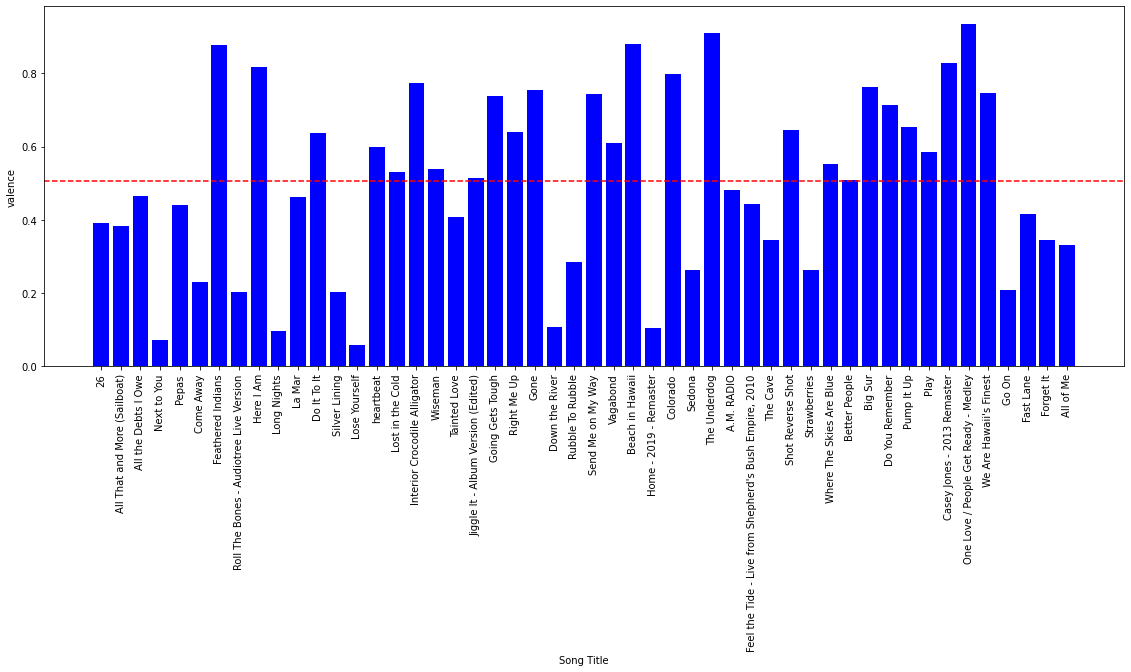

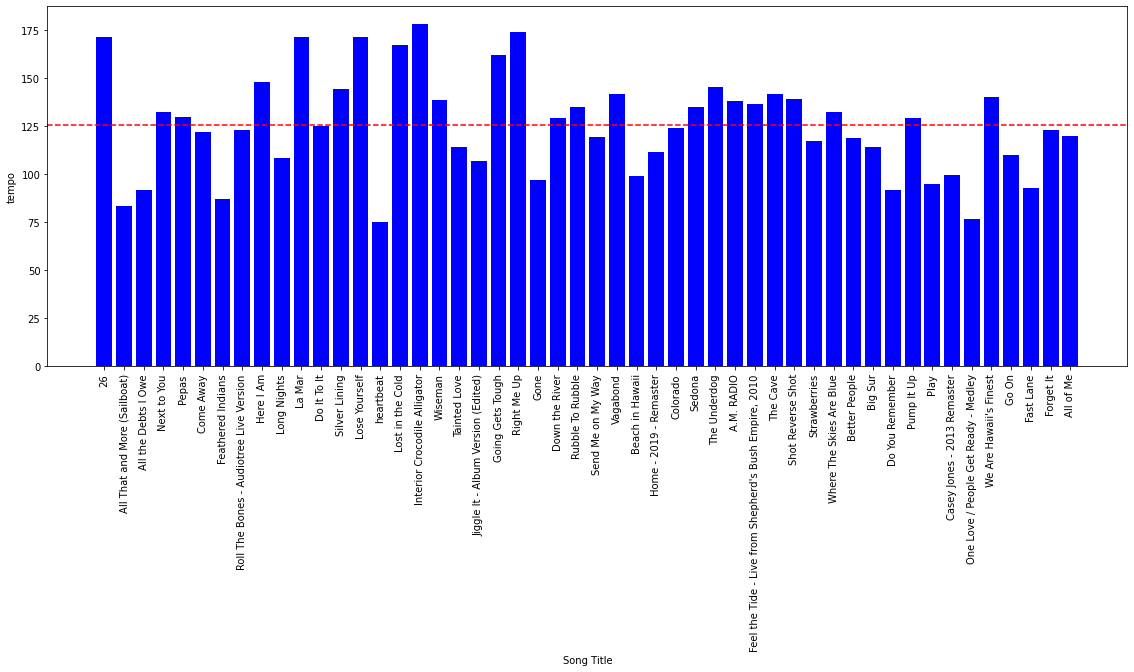

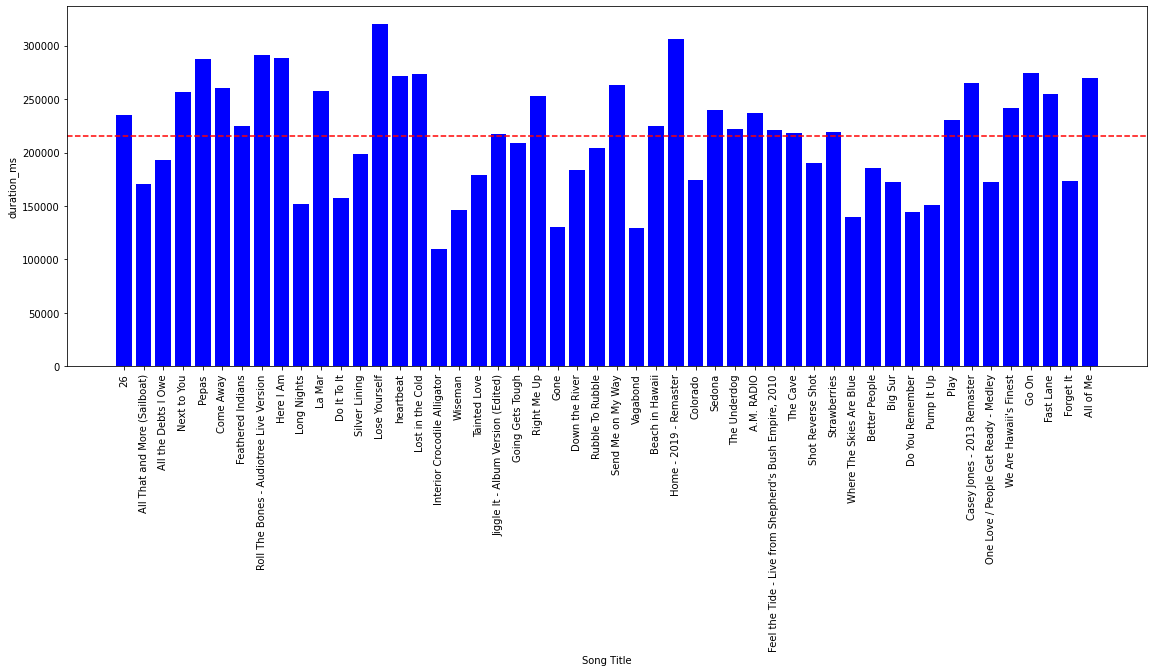

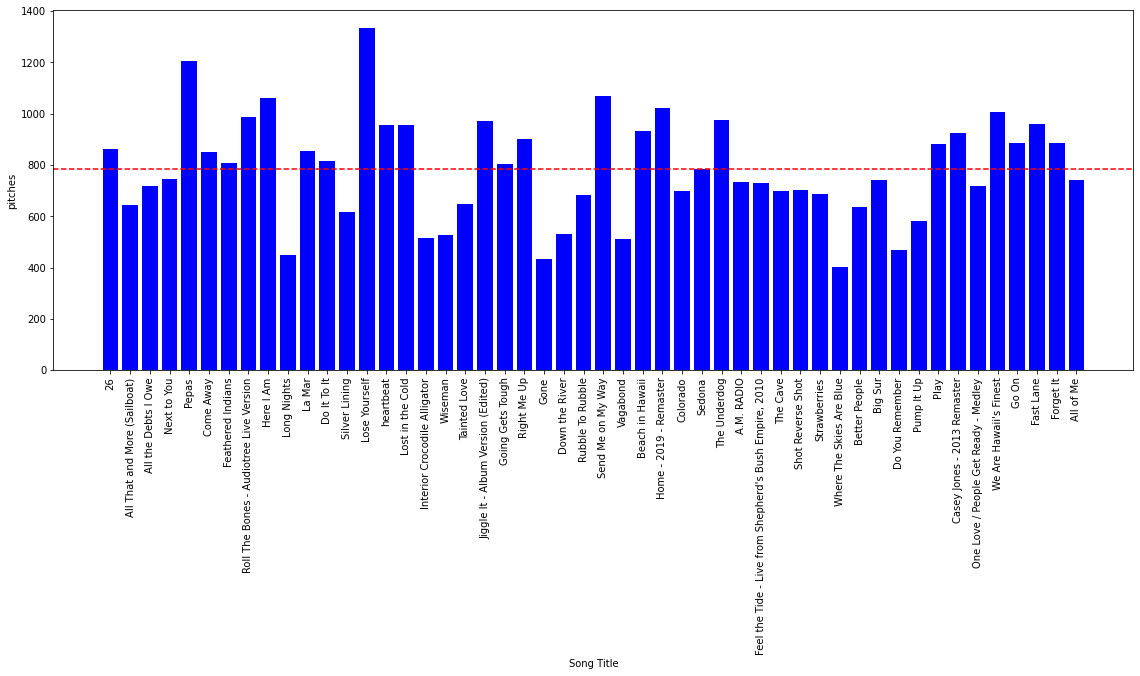

In [12]:


average_features = {}
#Function that will create a graph for each feature and song name to visualize the data. The function returns the average values for each feature. 
#This will allow us to reference which songs the user may like in the future. Because the average data is based of the top 50 songs the user listens to, 
# we can use the averages to understand which songs the user may also like. 
def makeAudioGraph(av_feats, df):
    for column in df: 
        if column != 'id' and column != 'Song_Name':
            average_y = np.average(df[column])
            fig = plt.figure(figsize=(15, 5))
            ax = fig.add_axes([0,0,1,1])
            title = df['Song_Name']
            feature = df[column]
            ax.bar(title,feature, color='blue')
            ax.set_ylabel(column)
            ax.set_xlabel('Song Title')
            plt.xticks(rotation = 90)
            plt.axhline(y= average_y,color='red', linestyle ='dashed')
            plt.show()
            print()
            av_feats[column] = average_y
            
    return av_feats

final_averages = makeAudioGraph(average_features, df)


In [13]:
from sklearn import datasets
from sklearn import preprocessing
import scipy.stats as stats
import seaborn as sns

song_names = []
ids = []
song_names = df['Song_Name']
ids  = df['id']
del df['Song_Name']
del df['id']
df.head()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,pitches
0,0.494,0.341,2,-12.501,0.0508,0.66200,0.000571,0.0673,0.3910,171.210,235416,861
1,0.455,0.525,7,-9.225,0.1490,0.80200,0.000000,0.2260,0.3830,83.237,171025,646
2,0.483,0.486,0,-11.062,0.0434,0.75300,0.004790,0.1340,0.4660,92.048,193049,717
3,0.443,0.419,7,-7.975,0.0321,0.63300,0.001830,0.4040,0.0719,132.204,256520,744
4,0.762,0.766,7,-3.955,0.0343,0.00776,0.000070,0.1280,0.4420,130.001,287120,1206


<AxesSubplot:>

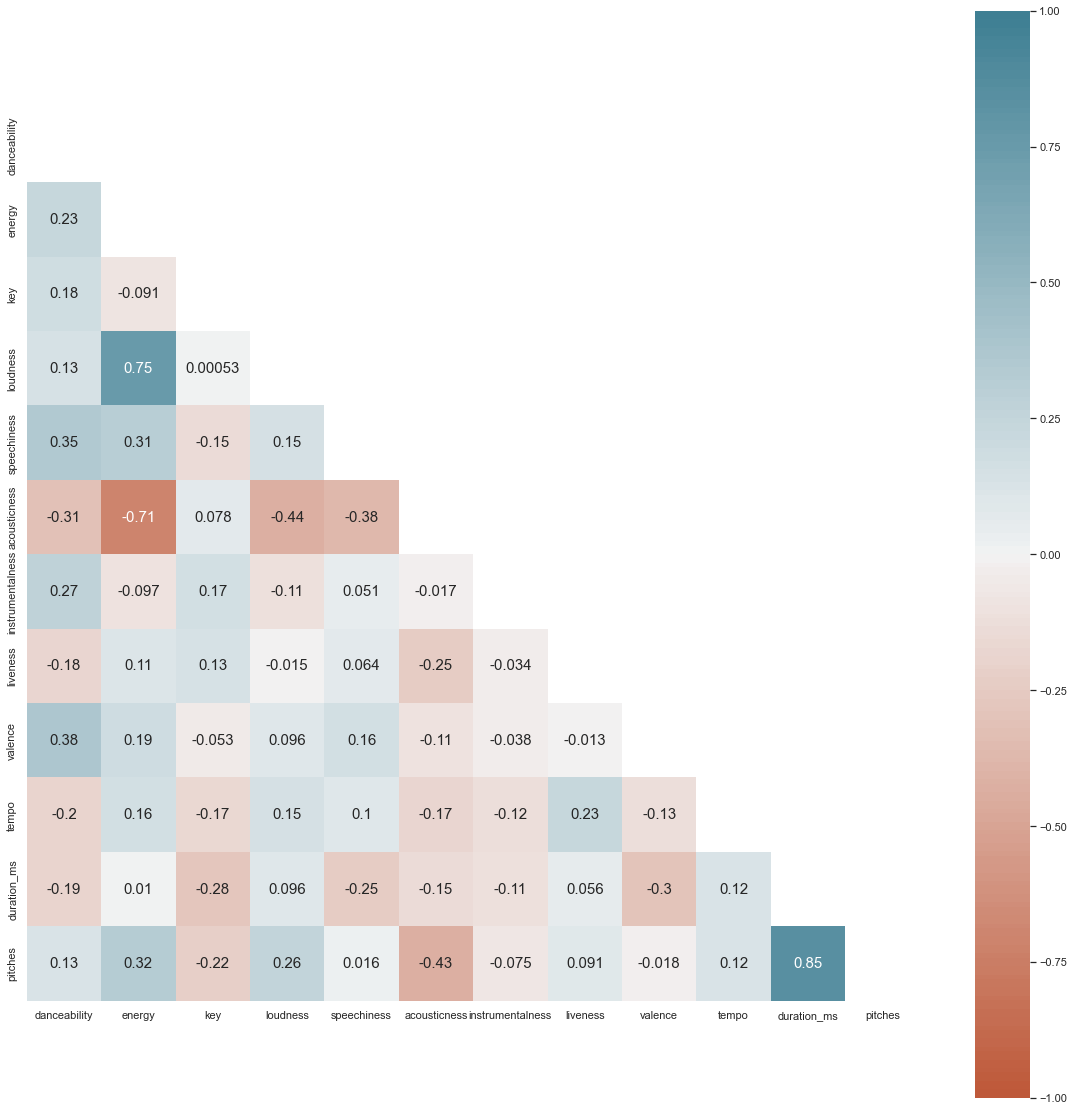

In [14]:
sns.set_theme(style="white")

tracks_correlation = df.corr()
mask = np.triu(np.ones_like(tracks_correlation, dtype=bool))

plt.subplots(figsize=(20,20))
sns.heatmap(
    tracks_correlation,
    
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(22, 220, n=150),
    
    annot=True, annot_kws={'size': 15},
    mask = mask,
    square=True
    
)
# Looking at the correlation graph, we can see that loudness and energy are positively correlated and accousticness and energy are negatively correlated.
# Furthermore, duration and pitches is highly correlated, but this is not helpful because this is known by the understanding that the length of a song will most 
#   likely mean that the song will have more pitches. 

In [15]:
#This block of code with take out outlier songs that are not similar to the rest based on the Z-score value
song_data = []
count_ = 0
for i in song_names:
    song_data.append(count)
    count += 1

id_data = []
count_ = 0
for i in ids:
    id_data.append(count)
    count += 1

df['Song_Name'] = song_data
df['id'] = id_data

z_scores = stats.zscore(df)
abs_z_scores = np.abs(z_scores)

filtered_entries = (abs_z_scores < 3).all(axis=1)
print(filtered_entries)
counter = 0
for i in filtered_entries:
    if i != True:
        del song_names[counter]
        del ids[counter]
    counter += 1

new_df = df[filtered_entries]


0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10    False
11     True
12     True
13     True
14     True
15     True
16    False
17     True
18    False
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26     True
27     True
28     True
29     True
30     True
31    False
32     True
33    False
34     True
35     True
36    False
37     True
38     True
39     True
40     True
41     True
42     True
43     True
44     True
45     True
46     True
47     True
48     True
49     True
dtype: bool


/var/folders/31/j25r7xhj7_n6w5wh3k5gwtm00000gn/T/ipykernel_26950/3725350455.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Song_Name'] = song_names
/var/folders/31/j25r7xhj7_n6w5wh3k5gwtm00000gn/T/ipykernel_26950/3725350455.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['id'] = ids


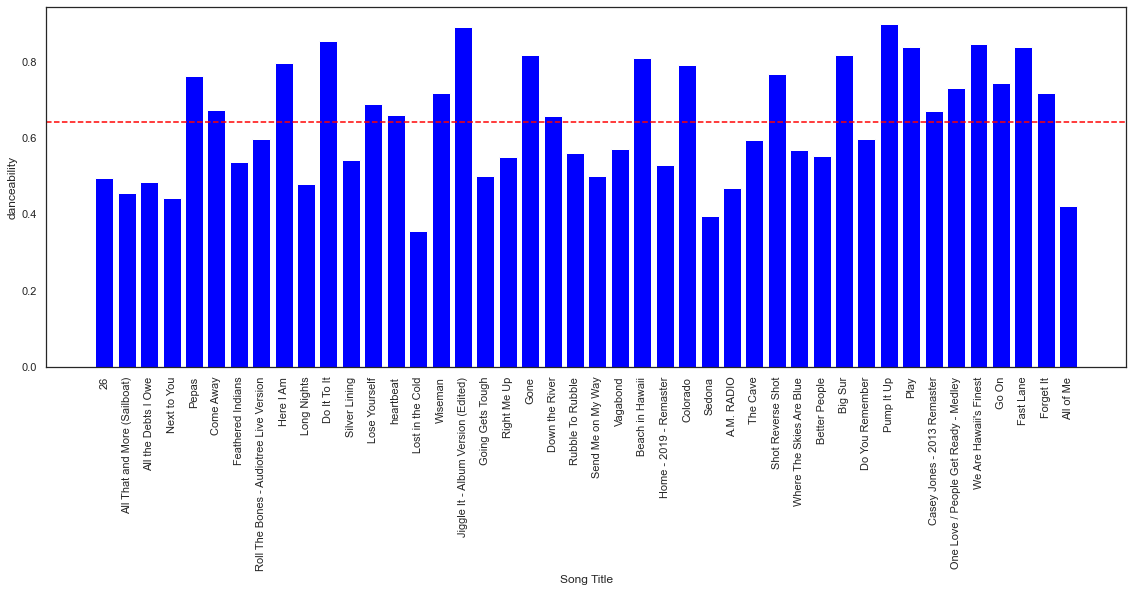

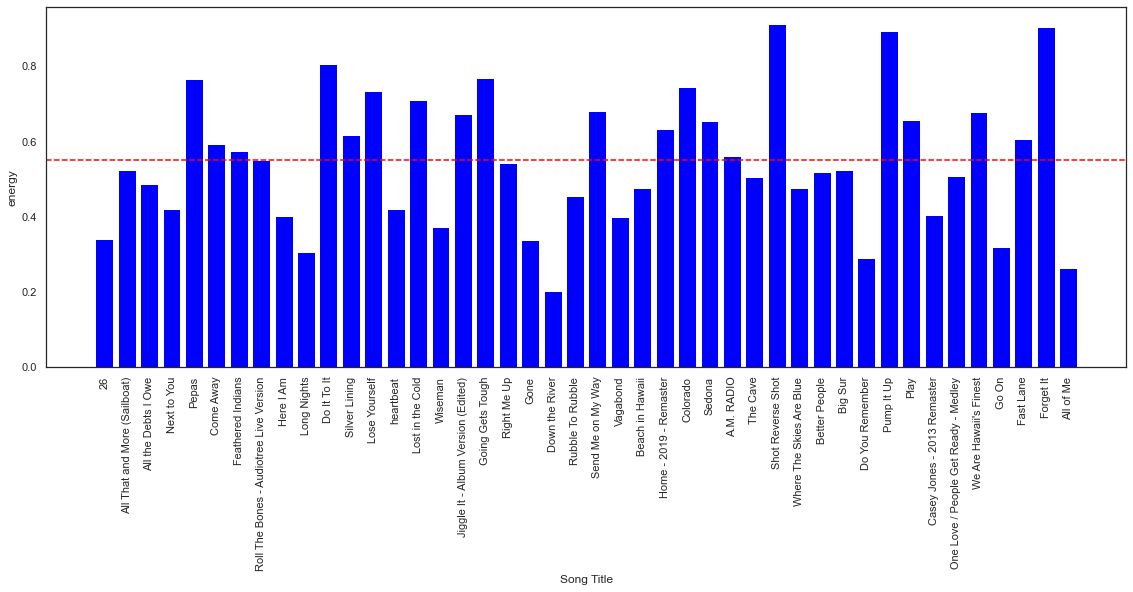

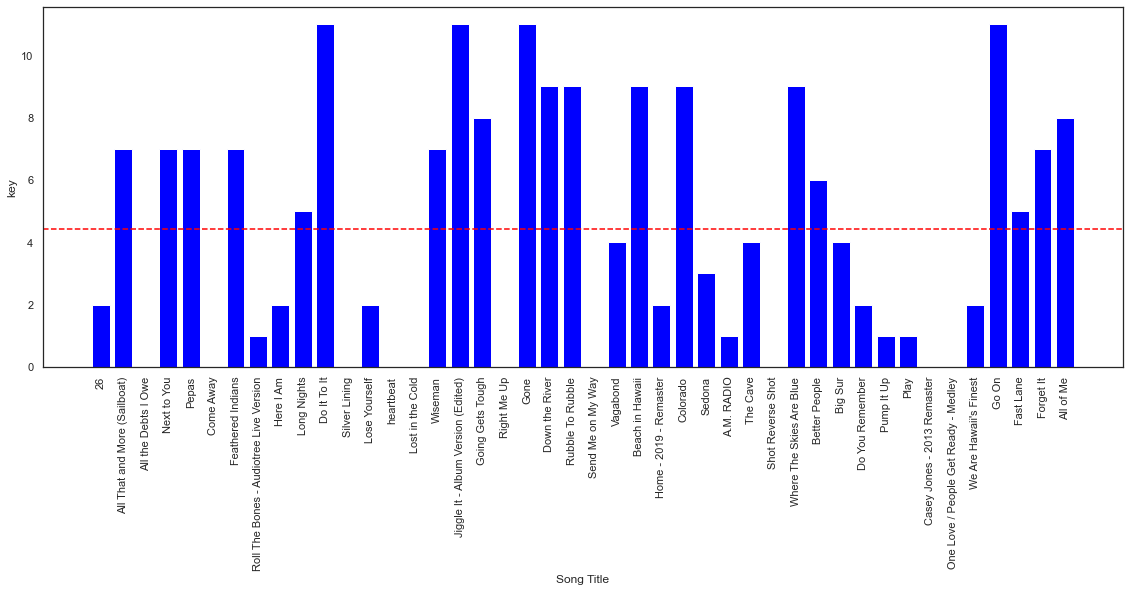

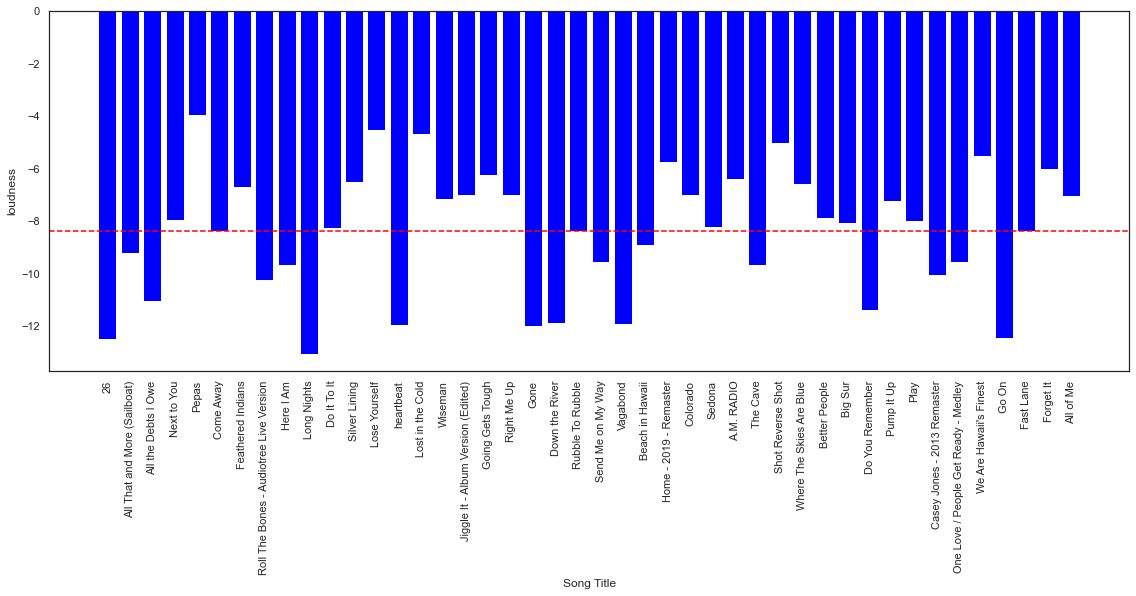

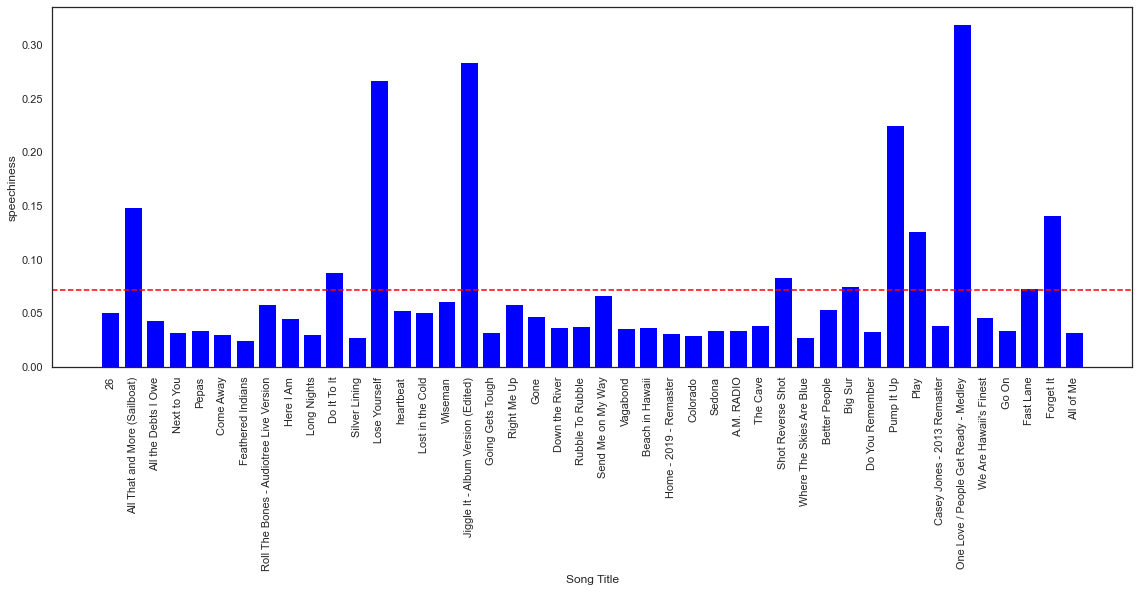

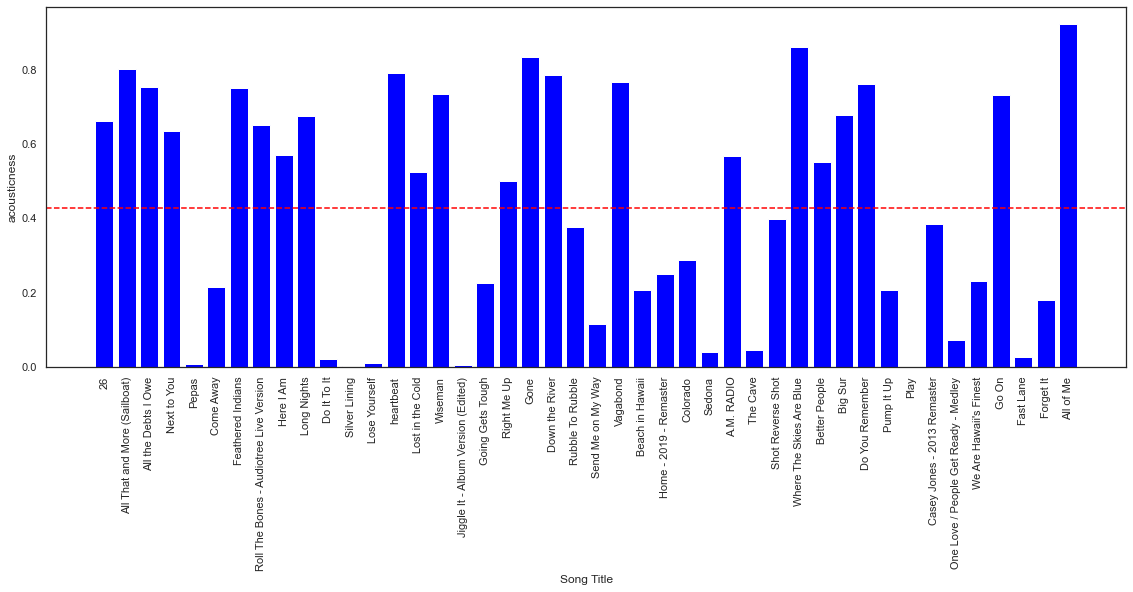

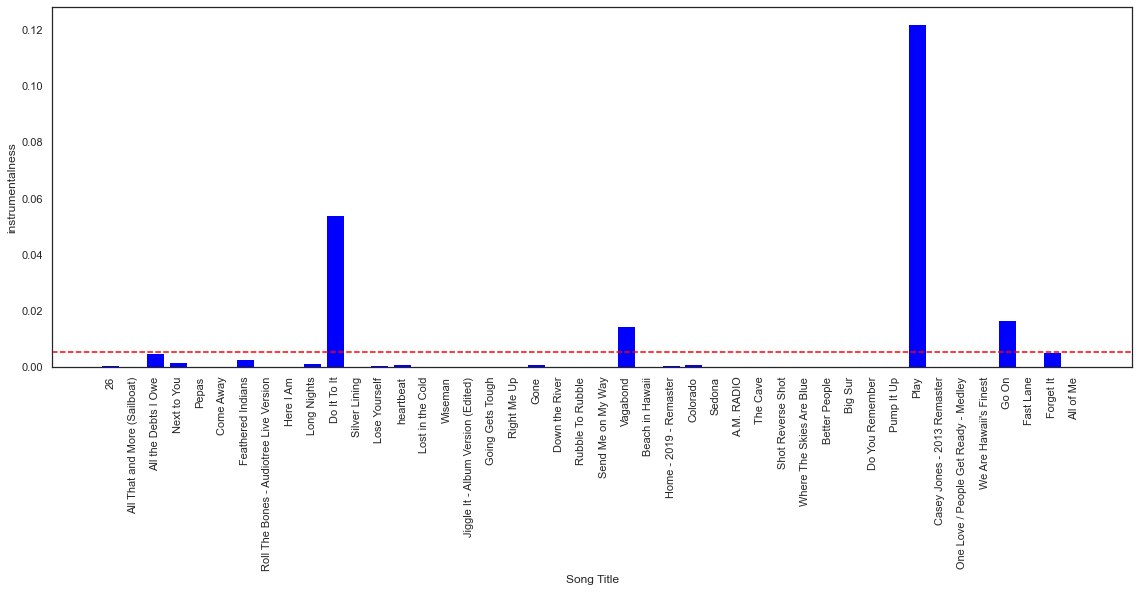

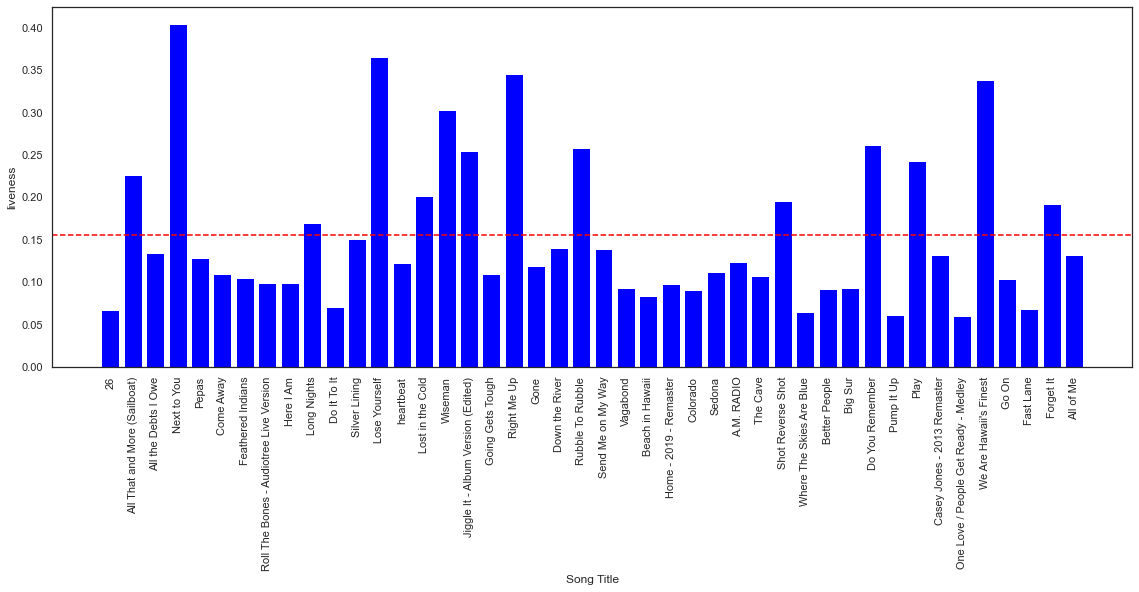

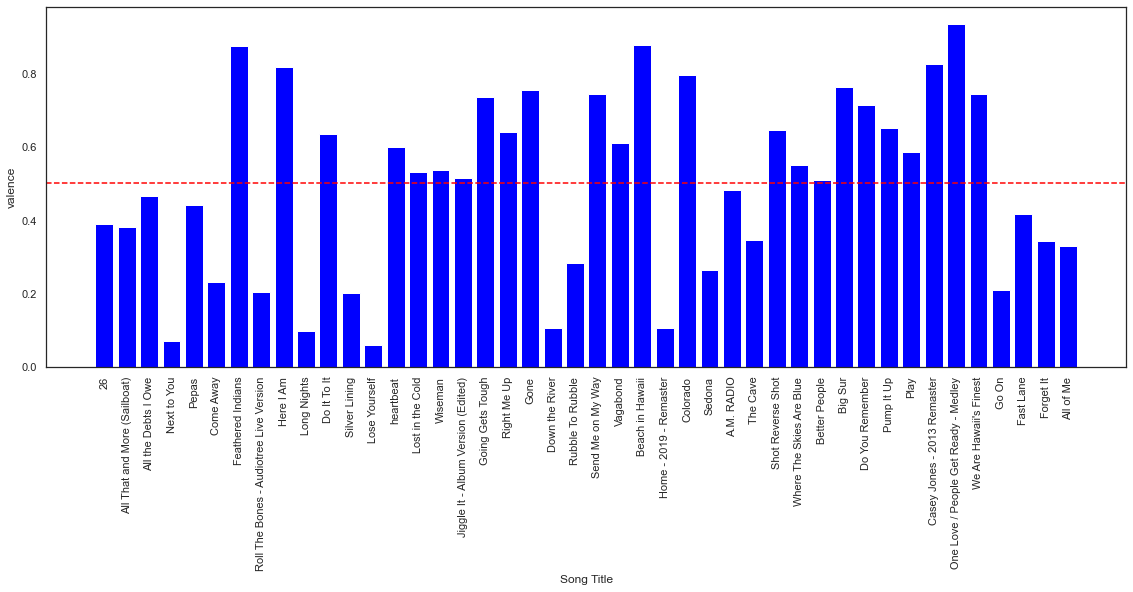

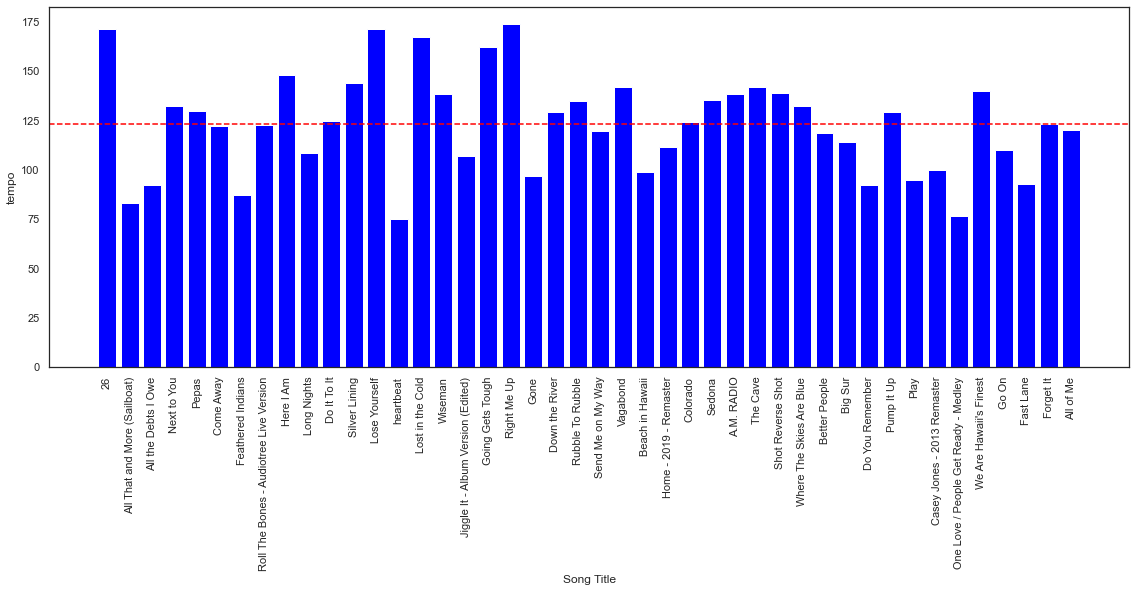

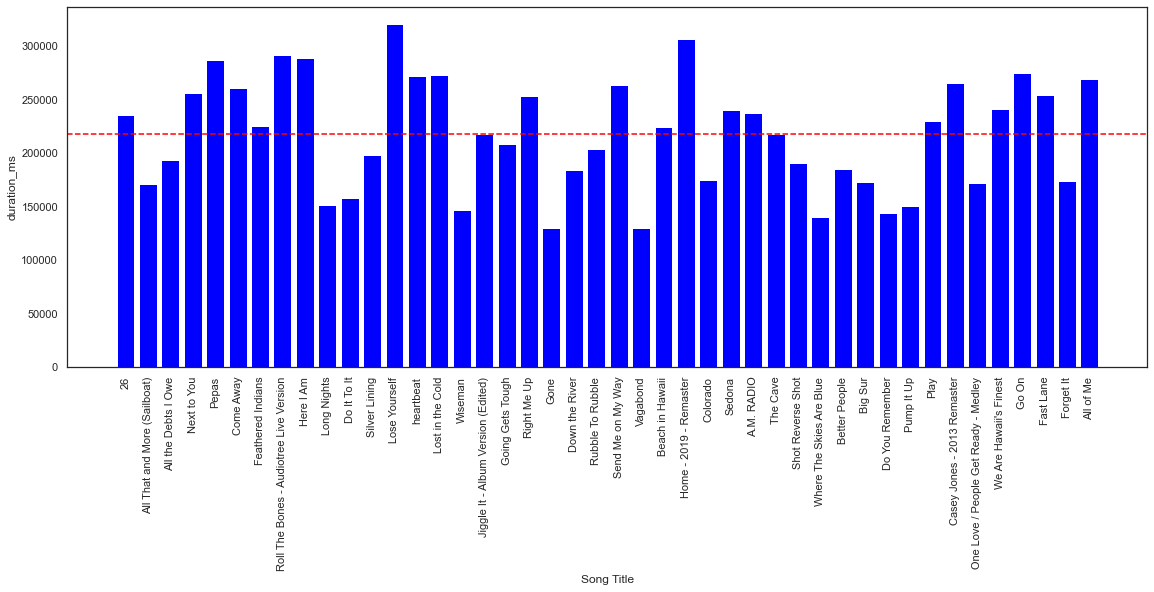

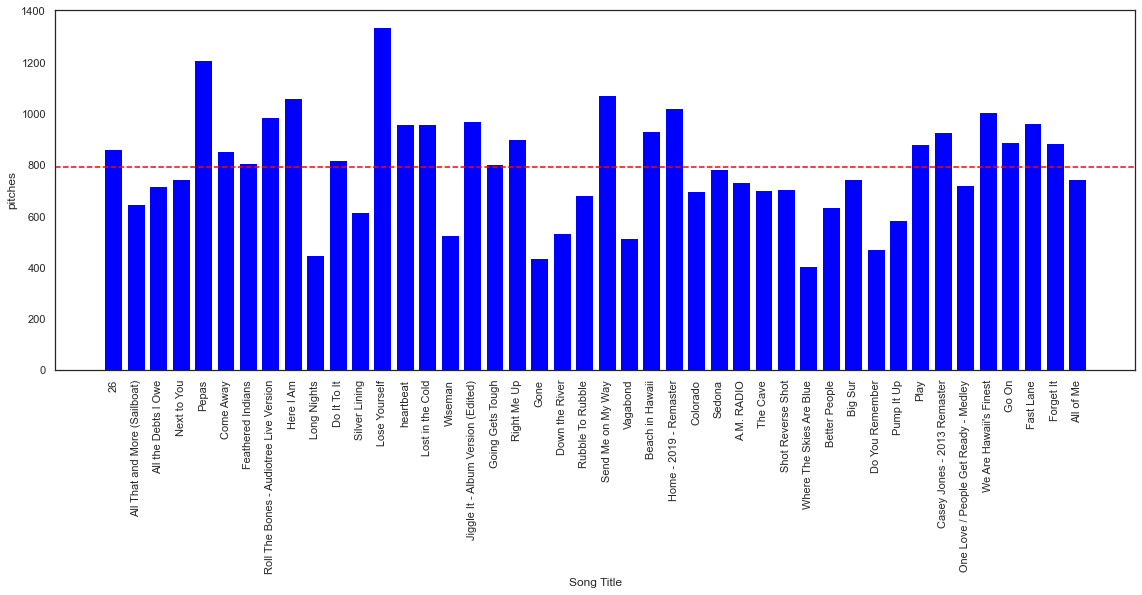


Values with outliers:
Average of:  danceability  is:  0.63898
Average of:  energy  is:  0.533114
Average of:  key  is:  4.46
Average of:  loudness  is:  -8.981720000000001
Average of:  speechiness  is:  0.079966
Average of:  acousticness  is:  0.42207086
Average of:  instrumentalness  is:  0.0122126958
Average of:  liveness  is:  0.183
Average of:  valence  is:  0.506366
Average of:  tempo  is:  125.5826
Average of:  duration_ms  is:  215890.36
Average of:  pitches  is:  785.56

Values with outliers taken out
Average of:  danceability  is:  0.6403409090909091
Average of:  energy  is:  0.5500454545454546
Average of:  key  is:  4.409090909090909
Average of:  loudness  is:  -8.39540909090909
Average of:  speechiness  is:  0.07191363636363636
Average of:  acousticness  is:  0.42726461363636364
Average of:  instrumentalness  is:  0.005235665681818181
Average of:  liveness  is:  0.15595454545454546
Average of:  valence  is:  0.5013022727272728
Average of:  tempo  is:  123.10779545454548
Ave

In [16]:
new_df['Song_Name'] = song_names
new_df['id'] = ids
average_features = {}
wo_outliers = makeAudioGraph(average_features, new_df)

#Print the average values with outliers and average values without outliers. 
print("Values with outliers:")
for key, value in final_averages.items():
    print('Average of: ',key, ' is: ', value)
print()
print("Values with outliers taken out")
for key, value in wo_outliers.items():
    print('Average of: ',key, ' is: ', value)

In [17]:
#Now see which feature has values that are closest to the average

In [18]:
print(min(new_df['danceability']), max(new_df['danceability']))

0.356 0.898


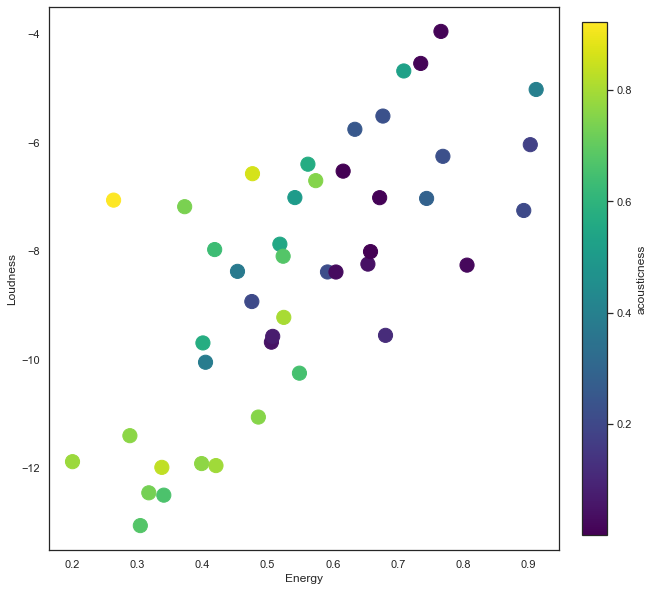

In [19]:
# This scatterplot shows that the lower the energy and the lower loudness, the song is most likely more acoustic. 

x = new_df['energy']
y = new_df['loudness']
colors = new_df['acousticness']
plt.figure(figsize=(10,10))

plt.scatter(x, y, c=colors, cmap='viridis', s=200)
plt.xlabel('Energy')
plt.ylabel('Loudness')

plt.colorbar(fraction=0.046, pad=0.04, label = 'acousticness')
plt.show()

In [20]:
sp_albums = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id="d7ab2112e221473a8b2a7a88c1aac45e",
                                                           client_secret="fde374bcf24947c1812412a474d3ef94"))

new_albums = sp_albums.new_releases(country=None, limit=50, offset=0)

In [43]:
albums_dict = {}
for i in new_albums['albums']['items']:
    if i['album_type'] != 'single':
        albums_dict[i['name']] = i['id']

In [100]:
new_albums_tracks = {}
for key, value in albums_dict.items():
    new_albums_tracks[key] = []
for key, value in albums_dict.items():
    tracks = sp_albums.album_tracks(value, limit=50, offset=0, market=None)
    for i in tracks['items']:
        new_albums_tracks[key].append([i['name'],i['id']])
        # print()
        # print(i['name'],'-',i['id'])
        # print()
    print('done album')


done album
done album
done album
done album
done album
done album
done album
done album
done album
done album
done album
done album
done album
done album
done album
done album


In [106]:
for key, value in new_albums_tracks.items():
    print('Tracks and Ids on: ', key)
    print(value)
    print()  

Tracks and Ids on:  Back For Everything
[['Let Me Know', '63gfBuiVoBne4Xhvb5H7d5'], ['Back For Everything', '07l80vtpJz1t1y4woqdzal'], ['Grinding All Season', '1jadydWtmjFcdlGOi0G6ci'], ['Smackers', '4s0nTw1JVoH0xV3bksuh6C'], ['On Everything', '3SgWgfBoO5JCJnpCwKd9DM'], ['Purple Stamp', '5vZqcDWLyN1GE7GibqcI3x'], ['Midas Touch', '4AH2lSWLVoMvbOHvHxa4i4'], ['Sink My Ship', '4sNYF3T8nOhhqV5IBqrWke'], ['Usain Boo', '4N20NYwhJRArlzEhdCKXka'], ['Vulnerable (Free Cool)', '0hMm6YHAdfsSDrJ8nG6eNW'], ['Elite Division', '5HrpjtKpx0LFGZgWYEOZWO'], ['Omega', '2eabPsdXKwyRw7kgsANPKx'], ['Hitting Houses', '2AU2JZs3dgfqt5bxkTmAtS'], ["Love Isn't Enough", '37zqDDDRlVCYrH2MZSvpbB'], ['Take You Back (feat. Lil Durk)', '1WrVBzjNuyDBqh0kXHFsCr'], ['He Love the Streets', '2e0HyOjm3Bze3Ri0tz3Uag'], ['Super Gremlin', '1Y5Jvi3eLi4Chwqch9GMem'], ['I Wish', '0FmKMGrNrrf12GmmCYh2eJ'], ['Love & War', '293mQGfVwgXIOdA1GpiwAt']]

Tracks and Ids on:  Love Sux
[['Cannonball', '6xXzhKhNNmBJ4q0Qzw485o'], ['Bois Lie (fe

In [107]:
def albumSongFeatures(new_albums_tracks_input, list):
    album_features = {}
    for album, song in new_albums_tracks_input.items():
        album_features[song] = []
    for song, value in album_features.items():
        for i in list:
            track_info = sp.audio_features(i[1])
            return track_info

albumSongFeatures(new_albums_tracks, new_albums_tracks['Back For Everything'])


[{'danceability': 0.573,
  'energy': 0.81,
  'key': 4,
  'loudness': -4.368,
  'mode': 0,
  'speechiness': 0.404,
  'acousticness': 0.18,
  'instrumentalness': 0,
  'liveness': 0.414,
  'valence': 0.278,
  'tempo': 176.984,
  'type': 'audio_features',
  'id': '63gfBuiVoBne4Xhvb5H7d5',
  'uri': 'spotify:track:63gfBuiVoBne4Xhvb5H7d5',
  'track_href': 'https://api.spotify.com/v1/tracks/63gfBuiVoBne4Xhvb5H7d5',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/63gfBuiVoBne4Xhvb5H7d5',
  'duration_ms': 200781,
  'time_signature': 4}]